In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("location_rev.csv")
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3,30527.57,1407,3302,12
1,38628.37,3,30185.49,1025,4422,11
2,39715.16,1,32182.24,1498,3260,12
3,35593.30,5,29728.65,2340,4325,10
4,35128.18,4,30691.17,847,3774,11


# Build model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
X=df.iloc[:,1:]
Y=df.revenue

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [6]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [7]:
model.intercept_

np.float64(-52707.68030419703)

In [8]:
model.coef_

array([-2.05764370e+03,  1.77826409e+00,  3.50411344e+00,  4.22972004e+00,
        2.04993740e+03])

In [9]:
y_pred=model.predict(X_test)

# Đánh giá mô hình

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
model.score(X,Y)

0.8131236121155437

In [12]:
model.score(X_test,Y_test)

0.8117808263851125

In [13]:
model.score(X_train,Y_train)

0.8136882173388531

In [14]:
mae=mean_absolute_error(y_pred,Y_test)
mae

4161.5757249418575

In [15]:
mse=mean_squared_error(y_pred,Y_test)
mse

25336615.634087257

# Trực quan hóa kết quả

<Axes: xlabel='Model predictions', ylabel='True value'>

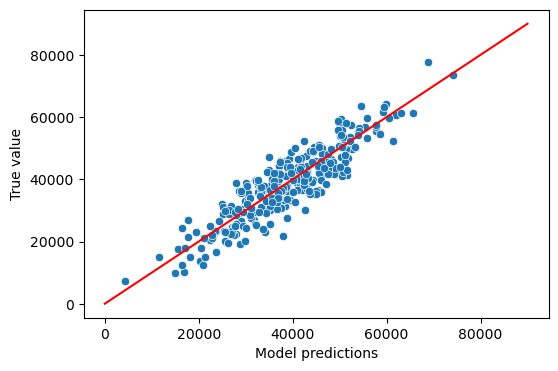

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred,y=Y_test)
plt.xlabel("Model predictions")
plt.ylabel("True value")
sns.lineplot(x=[0,90000],y=[0,90000],color="r")

<Axes: xlabel='Actual Test Values', ylabel='Predict Test Values'>

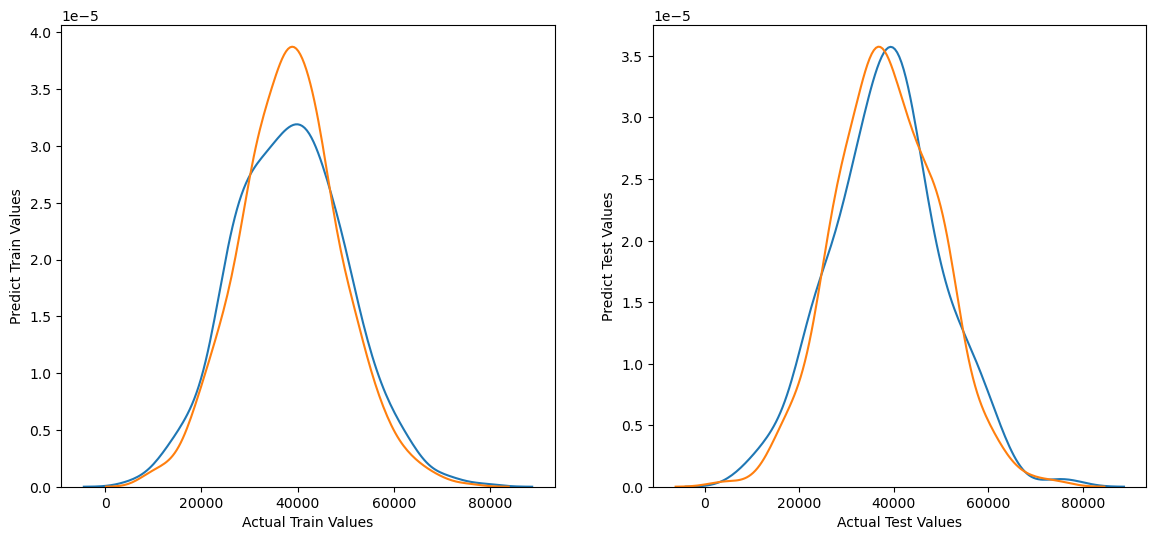

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1= sns.kdeplot(Y_train)
plt.xlabel("Actual Train Values")
plt.ylabel("Predict Train Values")
sns.kdeplot(model.predict(X_train))
plt.subplot(1,2,2)
ax1= sns.kdeplot(Y_test)
plt.xlabel("Actual Test Values")
plt.ylabel("Predict Test Values")
sns.kdeplot(y_pred,ax=ax1)


# Feature selection

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression

In [23]:
bestFeature=SelectKBest(score_func=f_regression,k="all")
fit=bestFeature.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [24]:
# 1. Gán lại tên cột cho dfscores và dfcolumns để dễ dàng kết hợp
dfcolumns.columns = ['Feature_Name']
dfscores.columns = ['F_Score']

# 2. Kết hợp hai DataFrame dựa trên chỉ mục (index)
feature_ranking = pd.concat([dfcolumns, dfscores], axis=1)

# 3. Sắp xếp các đặc trưng theo điểm F_Score từ cao đến thấp
feature_ranking = feature_ranking.sort_values(by='F_Score', ascending=False)

# 4. Hiển thị kết quả
print(feature_ranking)

          Feature_Name     F_Score
1        median_income  566.922357
4         location_age  439.125397
3   population_density  107.360798
2  num_loyalty_members   30.949544
0      num_competitors   25.117590
